<a href="https://colab.research.google.com/github/lawchris96/portfolio/blob/main/Profit_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/lawchris96/datascienceclass/main/samplesuperstore.csv')
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [3]:
len(df['City'].unique())

531

In [4]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

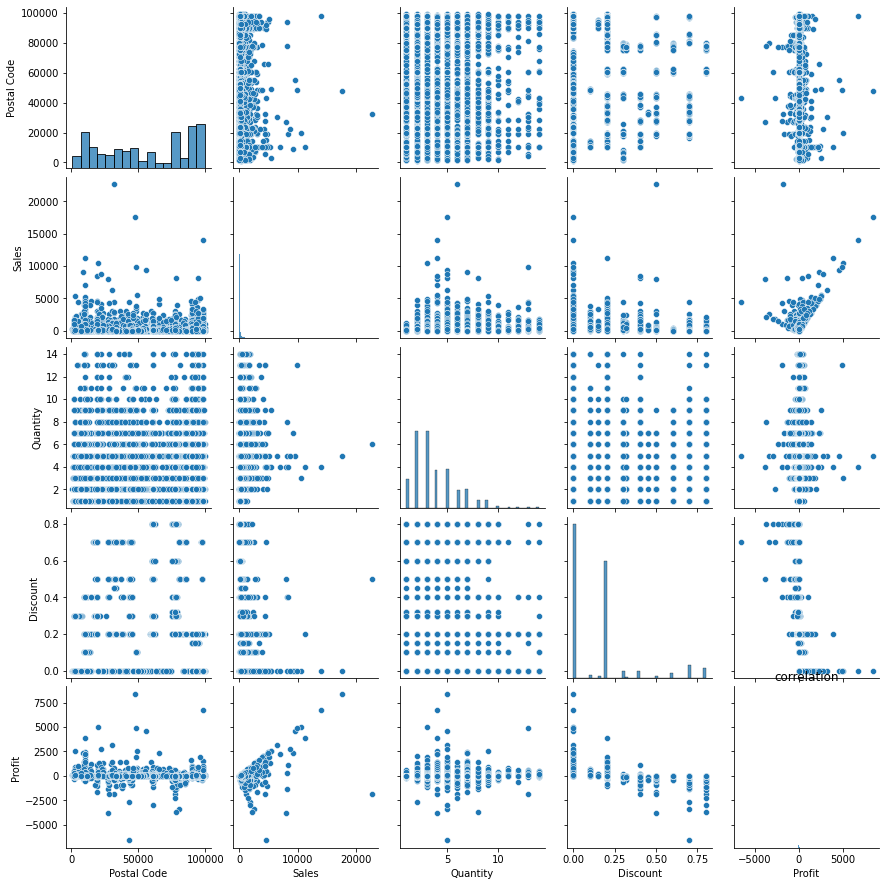

In [7]:
sns.pairplot(df)
plt.title('correlation')
plt.show()
# is there any correlation between sales and profits
# is there any correlation between discount and sales
# prefer to use heatmap

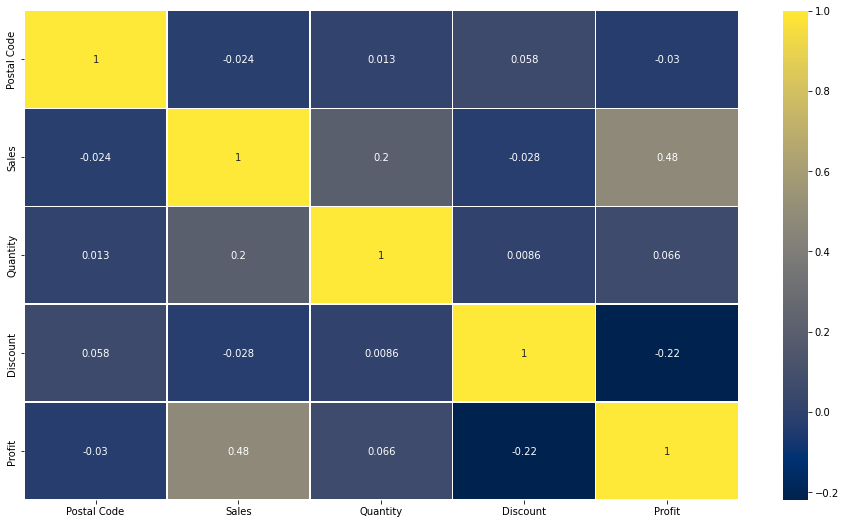

In [8]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(), cmap='cividis', linewidth=0.30, annot=True)
plt.show()
# correl only applies to number data types, int and float here not on the object/String data type
# we can see there is a positive correl between sales and profit
# we can see there is a negative correl between discount and sales, seems discount not really helpful in getting
# more sales here, we give discount affect our profits

In [9]:
cities = df['City'].unique()
cities
len(cities)
# we have a total of 531 cities

531

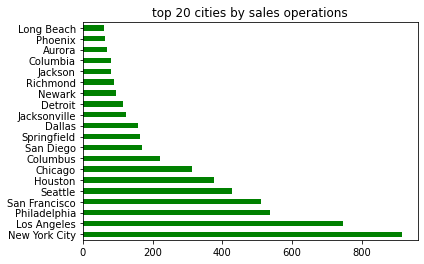

In [10]:
df.City.value_counts()[:20].plot(kind='barh',color='g')
plt.title('top 20 cities by sales operations')
plt.show()

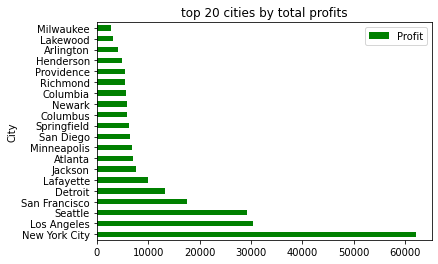

In [11]:
test = df.drop(['Postal Code', 'Sales', 'Quantity', 'Discount'], axis=1)
test = test.groupby(['City']).sum().sort_values(by='Profit', ascending=False).head(20)
test.plot(kind='barh',color='g')
plt.title('top 20 cities by total profits')
plt.show()

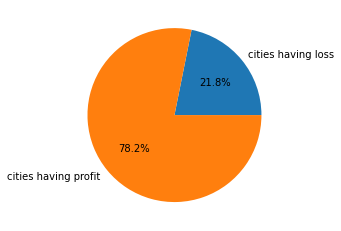

In [12]:
# create a list first
negtive_cities=[]
postive_cities=[]
profit_of_cities=[]
loss_of_cities=[]

# use for loop to get all the value in city and profit columns
# compare if profit and city mean valeu is less than 0
# its a loss else
for city in df['City'].unique():
    if df['Profit'][df['City']==city].mean()<=0:
        negtive_cities.append(city)
        loss_of_cities.append(df['Profit'][df['City']==city].mean())
    else:
        postive_cities.append(city)
        profit_of_cities.append(df['Profit'][df['City']==city].mean())
# plot the pie chart to show the numbers
plt.pie([len(negtive_cities),len(postive_cities)],labels=['cities having loss','cities having profit'],autopct='%1.1f%%')
plt.show()